In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from surprise import Reader, Dataset
from surprise.model_selection import train_test_split
from surprise import SVD, accuracy, NormalPredictor, BaselineOnly, KNNBasic, KNNWithZScore, KNNBaseline, SVDpp, NMF, SlopeOne, CoClustering
from surprise import accuracy

from surprise.model_selection import KFold
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV



In [2]:
# Load the Tribute dataset
data = pd.read_csv('tribute_data_no_dup.csv', sep='\t', names=['user', 'item', 'rating', 'timestamp'])

# Load the movielens-100k dataset
#data = pd.read_csv('ml-100k/u.data', sep='\t', names=['user', 'item', 'rating', 'timestamp'])

In [3]:
data.head()

,user,item,rating,timestamp
0,q12rqrqhNOgO9nYlMyjzLv3s2wr1,-LBg1Kfkp3e5W-6D9ABU,4,2018-05-04T22:09:06+02:00
1,q12rqrqhNOgO9nYlMyjzLv3s2wr1,-LBBlY3CGlcCtQNT2ik5,5,2018-05-04T22:15:57+02:00
2,RyAwn0zpKaM2OYemusKVQyBSoP02,-LBk551y05jH3OypKkma,4,2018-05-05T16:43:48+02:00
3,wOoY0DxMuidAX5s4MR3irSGZIbo1,-LBBlY3CGlcCtQNT2ik5,5,2018-05-06T17:09:08+02:00
4,wOoY0DxMuidAX5s4MR3irSGZIbo1,-LBkEU7Kcc_YaF4AlOtj,4,2018-05-07T15:47:51+02:00


In [4]:
moreInfo = data.groupby('user').count()
print(moreInfo)
moreInfo['item'].mean()
moreInfo.count()    

                              item  rating  timestamp
user                                                 
0F0S74oAPNbh4EdFAJlUDwia6Wz2     3       3          3
0HuaIMRfCOM6nCSqBnBqYBNqV7H2     1       1          1
0SJoy3zqneOUpZfukP8oRDCq02e2     3       3          3
0TAzZceG9yX7MoW2YX9N4spMPN72    10      10         10
0ZunYIMQH5hr3HWqEFBqXPbuH753     6       6          6
0dXXQYUUp4Ti9dapm8afHBasw4k2     2       2          2
0ix2JnwyMcQZoVjzybDlfTFVWQb2     3       3          3
0srjiZGjHbO7qHbyj5ulVZopLln1     4       4          4
14NTCKQGySh2M7aClucbUZN9kgp2     1       1          1
14XgvGaobYgqLwnN7ijPY83o6nK2     2       2          2
1DL0FCEosuUcEjnWIOCr4W7QVJJ2     1       1          1
1K80KrIfB8Uv7RS1TKW3VBJLM9B3     2       2          2
1M8ABFBB7kQTBGXumdAIyTcrQBu1     4       4          4
1WNNHxAhG4fhgD8N91x38ejHS1r2     4       4          4
1YImOpe7FUUP2i9uufFUjs4bdI82     4       4          4
1jzDT6oGIqVjqhSLOFb3pKeWYaj2     1       1          1
1tFXr2vKkLNZLLtUeZESFX4Tbp72

item         549
rating       549
timestamp    549
dtype: int64

In [5]:
moreInfo2 = data.groupby('item').count()
print(moreInfo2)
moreInfo2['user'].mean()
moreInfo2.count()    

                      user  rating  timestamp
item                                         
-LAYylqiCbWobN9UtpEs     2       2          2
-LAYzUVcRcUzgNojd_s3     1       1          1
-LAYzmbvxctiM1xNhyB5     1       1          1
-LAZ-trTyK2fz5juB7Gx     3       3          3
-LAZ057y9NW3Xvz3Vpgb     3       3          3
-LAZ0MpABo_MWtVA4wRP     3       3          3
-LAZ0mpfI3qs5dPglW8f    16      16         16
-LAbTktZ2G9ALFxvQ5tE     5       5          5
-LAbV9UES7Beac8puXeW     4       4          4
-LAbVOurHy0MBYRaXIlB    13      13         13
-LAbWAf9YNgmeXANf5VT     1       1          1
-LAbXNH41rOaioKHue0L     2       2          2
-LAbX_q7bJiJfK-ipmu8    11      11         11
-LAbXnmtNfo3wEiR_bhD     1       1          1
-LAbY6q6eokgKBIJIRTR    27      27         27
-LAbYJHf6DBSYostvni4     3       3          3
-LAbZFUQ2j_n9Fk8klLl     3       3          3
-LAbZp54Trf_491p5L-n     2       2          2
-LAb_hBiajeUtyuRFpGr     2       2          2
-LAba8yikI1OF0GVPuJb     1       1

user         265
rating       265
timestamp    265
dtype: int64

In [24]:
data.rating.value_counts()

5    1389
4     688
3     276
2     114
1      97
Name: rating, dtype: int64

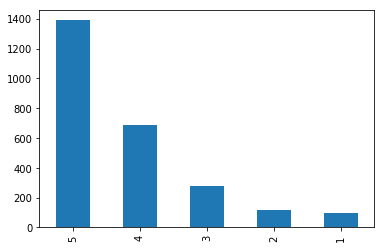

In [25]:
data.rating.value_counts().plot(kind='bar')
plt.show()

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2564 entries, 0 to 2563
Data columns (total 4 columns):
user         2564 non-null object
item         2564 non-null object
rating       2564 non-null int64
timestamp    2564 non-null object
dtypes: int64(1), object(3)
memory usage: 80.2+ KB


In [27]:
data.isnull().sum()

user         0
item         0
rating       0
timestamp    0
dtype: int64

In [28]:
data = data[['user', 'item', 'rating', 'timestamp']]
data = data.iloc[:, :-1]

In [29]:
data.head()

,user,item,rating
0,q12rqrqhNOgO9nYlMyjzLv3s2wr1,-LBg1Kfkp3e5W-6D9ABU,4
1,q12rqrqhNOgO9nYlMyjzLv3s2wr1,-LBBlY3CGlcCtQNT2ik5,5
2,RyAwn0zpKaM2OYemusKVQyBSoP02,-LBk551y05jH3OypKkma,4
3,wOoY0DxMuidAX5s4MR3irSGZIbo1,-LBBlY3CGlcCtQNT2ik5,5
4,wOoY0DxMuidAX5s4MR3irSGZIbo1,-LBkEU7Kcc_YaF4AlOtj,4


In [31]:
reader = Reader()
data = Dataset.load_from_df(data[['user', 'item', 'rating']], reader)

In [32]:
trainset, testset = train_test_split(data, test_size=0.25)

In [33]:
# Choice of Similarity Measure and choice of item-item or user-user
sim_options = {
                #'name': 'cosine',
                'name': 'pearson',
                #'name': 'pearson_baseline',
                'user_based': True  # compute  similarities between users
                #'user_based': False  # compute  similarities between items
               }

# Choice of algorithm

#algo = NormalPredictor()
#algo = BaselineOnly()
#algo = KNNBasic(sim_options=sim_options)
algo = KNNBaseline(sim_options=sim_options)
#algo = KNNWithZScore(sim_options=sim_options)
#algo = SVD()
#algo = SVDpp()
#algo = NMF()
#algo = SlopeOne()
#algo = CoClustering()

algo.fit(trainset)

Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.


In [34]:
predictions = algo.test(testset)

print(predictions)

[Prediction(uid='CG4v0Q3sCjWVifFhflpcnrnESOs2', iid='-LEOv9VxE7eX_QF0ea_t', r_ui=5.0, est=4.353369639765369, details={'actual_k': 0, 'was_impossible': False}), Prediction(uid='Bk1Ptk0FFzZQCV4O7BOGHAcRC7o1', iid='-LAlm5ocAHln8UI_1qq0', r_ui=4.0, est=4.281167702638955, details={'actual_k': 0, 'was_impossible': False}), Prediction(uid='COAuW1WAD0cRmi6ZmHBj4AUsuRr1', iid='-LD0kGJOJfSwonotUr_w', r_ui=5.0, est=4.445436524124398, details={'actual_k': 1, 'was_impossible': False}), Prediction(uid='TBU5czxtVcNpQeY4kF7IX8Q9IkE3', iid='-LAlgFVtrw4sztUqtTId', r_ui=5.0, est=4.453197792402163, details={'actual_k': 0, 'was_impossible': False}), Prediction(uid='RSdEvtsq8IZPahlHLJrXtjknpkz1', iid='-LEdM0vihZbsvHh5MwTb', r_ui=4.0, est=4.22239795938674, details={'actual_k': 0, 'was_impossible': False}), Prediction(uid='qKFU0oB7KSZmXGGObHCI8qPXWKj2', iid='-LEdGdXwQCTXW-77Jh3i', r_ui=4.0, est=1.7084876918281622, details={'actual_k': 2, 'was_impossible': False}), Prediction(uid='OY51s8BvQ7RxUP1RirfNm6MKS0b2'

In [36]:
# Cross Validation using Mean Absolut Error, Root Mean Square Error
cross_validate(algo, data, measures=['MAE', 'RMSE', 'MSE', 'FCP'], cv=3, verbose=True)

Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE, MSE, FCP of algorithm KNNBaseline on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
MAE (testset)     0.7832  0.7306  0.7686  0.7608  0.0222  
RMSE (testset)    1.0379  0.9788  1.0123  1.0097  0.0242  
MSE (testset)     1.0772  0.9580  1.0247  1.0200  0.0488  
FCP (testset)     0.6371  0.5742  0.5818  0.5977  0.0280  
Fit time          0.03    0.03    0.03    0.03    0.00    
Test time         0.02    0.02    0.02    0.02    0.00    


{'test_mae': array([0.78316578, 0.73059439, 0.76855321]),
 'test_rmse': array([1.03790395, 0.97876361, 1.01229739]),
 'test_mse': array([1.07724461, 0.95797821, 1.02474601]),
 'test_fcp': array([0.63710267, 0.57416073, 0.58179079]),
 'fit_time': (0.029597997665405273, 0.03290700912475586, 0.026253223419189453),
 'test_time': (0.020978927612304688,
  0.023254871368408203,
  0.020014047622680664)}

In [38]:
# TOP_N RECOMMENDATIONS

from collections import defaultdict

from surprise import SVD
from surprise import Dataset


def get_top_n(predictions, n=50):
    '''Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    '''

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

# Then predict ratings for all pairs (u, i) that are NOT in the training set.
testset = trainset.build_anti_testset()
predictions = algo.test(testset)

top_n = get_top_n(predictions, n=50)

# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

    

NqEQzIIgctRbcPyVcSX6OFZmnXn1 ['-LAmKFuqBHWY7GxaBKbl', '-LAZ0mpfI3qs5dPglW8f', '-LAlx-HQhRerW-P4ZkfK', '-LAlkqJoNWK8eiUOp_fx', '-LAm8xUs0MAJGstlnjA9', '-LAlgFVtrw4sztUqtTId', '-LAm5J18RksU1Fak1Mm5', '-LEZZXBA9GkjOLO46Vlh', '-LD0szSdpLRzPfyr4_T4', '-LD112QkLe0OJRWsl9gt', '-LD0wKEo03C3Qq_LGfO8', '-LJSmApyQzlGqN5FFtuz', '-LGK41NpglDoyMqnAfjN', '-LG4wppRYV4cSK8oA_CD', '-LEZb74KA0gxTMyvktdM', '-LEOv9VxE7eX_QF0ea_t', '-LD0kGJOJfSwonotUr_w', '-LBBlY3CGlcCtQNT2ik5', '-LAYylqiCbWobN9UtpEs', '-LBksN259TNRUUllXg4t', '-LAbX_q7bJiJfK-ipmu8', '-LD0kqoxApiZMFoBG8Az', '-LD0sbxijVHepoeml1Po', '-LD0kXlcT4DroLuANwD-', '-LCzIqJw16af9EFdB43S', '-LCOFXJBbV9ioOPBmLz7', '-LD1-d0i0yMdJULKfXIE', '-LEZfFHlqcxsXhyKW4Eq', '-LEZYK9fQ_8Dohym3447', '-LMHjQuTwc_n-zI65NYC', '-LAm9XAQG9vCHAfzcEfy', '-LULVRPWDNDFCYa0Buuo', '-LBl8KFasMiG4TWbILeO', '-LG4y8nolMzUTQE1909b', '-LEUEbn8xihteQXFwOPD', '-LZfHBLzmgr3V8kthLhS', '-LD0lpk1bI5WtR9HKuAq', '-LEZY40BlJJDVi_r3g4a', '-LEdKV7QCY71YJXk-FIs', '-LBkfDOJvgWF6FVaX5mx', '-LEdM0vih

In [18]:
# PRECISION AND RECALL
from surprise.model_selection import KFold


def precision_recall_at_k(predictions, k=50, threshold=4):
    '''Return precision and recall at k metrics for each user.'''

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1

        # Recall@K: Proportion of relevant items that are recommended
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1

    return precisions, recalls


#data = Dataset.load_builtin('ml-100k')
kf = KFold(n_splits=5)

prec_all = []
rec_all = []

for trainset, testset in kf.split(data):
    algo.fit(trainset)
    predictions = algo.test(testset)
    precisions, recalls = precision_recall_at_k(predictions, k=5, threshold=4)

    # Precision and recall can then be averaged over all users
    prec_all.append(sum(prec for prec in precisions.values()) / len(precisions))
    rec_all.append(sum(rec for rec in recalls.values()) / len(recalls))

average_prec = sum(prec_all)/5 
average_rec = sum(rec_all)/5 

first_cal = 2*average_prec*average_rec
second_cal = average_prec+average_rec
f1_score = first_cal/second_cal

print("Precision: ", average_prec)
print("Recall: ", average_rec)
print("F1-Score: ", f1_score)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Precision:  0.8792219096979739
Recall:  0.293557900390697
F1-Score:  0.4401551520040608


In [19]:
# Prepaer Hit Rate calculations
topNPredicted = top_n
leftOutPredictions = algo.test(testset)

In [20]:
# Hit Rate
def HitRate(topNPredicted, leftOutPredictions):
    hits = 0
    total = 0

 # For each left-out rating
    for leftOut in leftOutPredictions:
        userID = leftOut[0]
        leftOutItemID = leftOut[1]
        # Is it in the predicted top 50 for this user?
        hit = False
        for item, predictedRating in topNPredicted[int(userID)]:
            if (int(leftOutItemID) == int(item)):
                hit = True
                break
        if (hit) :
            hits += 1

        total += 1

    # Compute overall precision
    return hits/total
print("\nHit Rate: ", HitRate(topNPredicted, leftOutPredictions))


Hit Rate:  0.0332


In [21]:
# Hit Rate by rating value
def RatingHitRate(topNPredicted, leftOutPredictions):
    hits = defaultdict(float)
    total = defaultdict(float)
    # For each left-out rating
    for user, leftOutItemID, actualRating, estimatedRating, _ in leftOutPredictions:
        # Is it in the predicted top N for this user?
        hit = False
        for item, predictedRating in topNPredicted[int(user)]:
            if (int(leftOutItemID) == item):
                hit = True
                break
        if (hit) :
            hits[actualRating] += 1
        total[actualRating] += 1

    # Compute overall precision
    for rating in sorted(hits.keys()):
        print(rating, hits[rating] / total[rating])
print("Hit Rate by Rating value: ")
RatingHitRate(topNPredicted, leftOutPredictions)

Hit Rate by Rating value: 
1.0 0.0008019246190858059
2.0 0.0017897091722595079
3.0 0.0011467889908256881
4.0 0.012701584130155558
5.0 0.13180649684505727


In [22]:
# Cumulative Hit Rate

def CumulativeHitRate(topNPredicted, leftOutPredictions, ratingCutoff=0):
    hits = 0
    total = 0
    # For each left-out rating
    for user, leftOutItemID, actualRating, estimatedRating, _ in leftOutPredictions:
        # Only look at ability to recommend things the users actually liked...
        if (actualRating >= ratingCutoff):
            # Is it in the predicted top 50 for this user?
            hit = False
            for item, predictedRating in topNPredicted[int(user)]:
                if (int(leftOutItemID) == item):
                    hit = True
                    break
            if (hit) :
                hits += 1
            total += 1

        # Compute overall precision
    return hits/total
print("Cumulative Hit Rate (rating >= 4): ", CumulativeHitRate(topNPredicted, leftOutPredictions, 4.0))

Cumulative Hit Rate (rating >= 4):  0.057859294701399965


In [23]:
# Average Reciprocal Hit Ranking (ARHR)

def AverageReciprocalHitRank(topNPredicted, leftOutPredictions):
    summation = 0
    total = 0
        # For each left-out rating
    for user, leftOutItemID, actualRating, estimatedRating, _ in leftOutPredictions:
        # Is it in the predicted top N for this user?
        hitRank = 0
        rank = 0
        for item, predictedRating in topNPredicted[int(user)]:
            rank = rank + 1
            if (int(leftOutItemID) == item):
                hitRank = rank
                break
        if (hitRank > 0) :
                summation += 1.0 / hitRank

        total += 1

    return summation / total

print("Average Reciprocal Hit Rank: ", AverageReciprocalHitRank(topNPredicted, leftOutPredictions))

Average Reciprocal Hit Rank:  0.0019148809896489555
